# Text Classification:

## Data
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
5. Below we provided count plot of all the labels in our data. 
</pre>

<IPython.core.display.Javascript object>


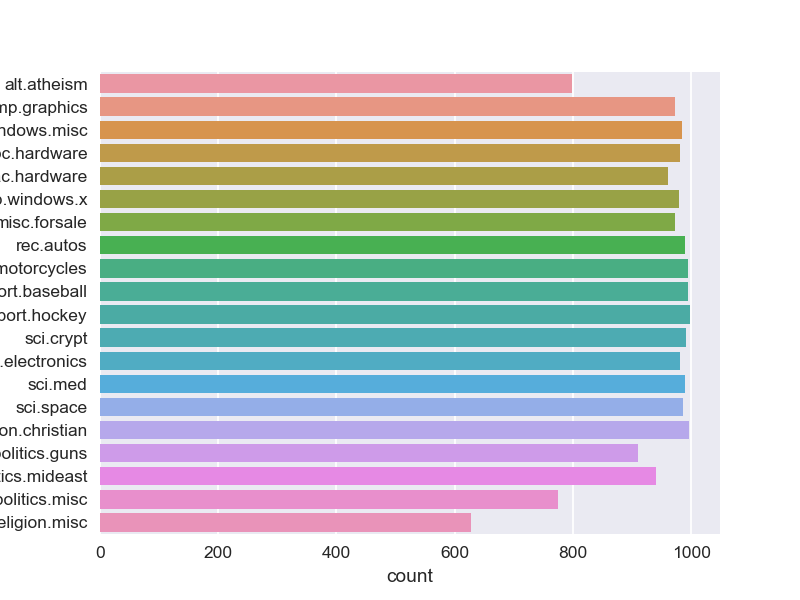

In [ ]:
### count plot of all the class labels. 

## Assignment:

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

### Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

In [ ]:
# we have collected all emails and preprocessed them, this is sample output
preprocessed_email

array(['juliet caltech edu',
       'coding bchs edu newsgate sps mot austlcm sps mot austlcm sps mot com  dna bchs edu',
       'batman bmd trw', ..., 'rbdc wsnc org dscomsa desy zeus  desy',
       'rbdc wsnc org morrow stanford edu pangea Stanford EDU',
       'rbdc wsnc org apollo apollo'], dtype=object)

In [ ]:
len(preprocessed_email)

18828

<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

In [ ]:
#i am living in the New York
print("i am living in the New York -->", list(chunks))
print(" ")
print("-"*50)
print(" ")
#My name is Srikanth Varma
print("My name is Srikanth Varma -->", list(chunks1))

i am living in the New York --> [('i', 'NN'), ('am', 'VBP'), ('living', 'VBG'), ('in', 'IN'), ('the', 'DT'), Tree('GPE', [('New', 'NNP'), ('York', 'NNP')])]
 
--------------------------------------------------
 
My name is Srikanth Varma --> [('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), Tree('PERSON', [('Srikanth', 'NNP'), ('Varma', 'NNP')])]


<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

<pre>
<font color='blue'><b>13.</b></font> Replace all the digits with space i.e delete all the digits. 
> In the above sample document, the 6th line have digit 100, so we have to remove that.

<font color='blue'><b>14.</b></font> After doing above points, we observed there might be few word's like
 <b> "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _)</b> remove the <b>_</b> from these type of words. 

<font color='blue'><b>15.</b></font>  We also observed some words like <b> "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin </b>, in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

<font color='blue'><b>16.</b></font> Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

<font color='blue'><b>17.</b></font> replace all the words except "A-Za-z_" with space. 

<font color='blue'><b>18.</b></font> Now You got Preprocessed Text, email, subject. create a dataframe with those. 
Below are the columns of the df. 
</pre>

In [ ]:
data.columns

Index(['text', 'class', 'preprocessed_text', 'preprocessed_subject',
       'preprocessed_emails'],
      dtype='object')


In [ ]:
data.iloc[400]

text                    From: arc1@ukc.ac.uk (Tony Curtis)\r\r\r\nSubj...
class                                                         alt.atheism
preprocessed_text       said re is article if followed the quoting rig...
preprocessed_subject                                christian morality is
preprocessed_emails                                   ukc mac macalstr edu
Name: 567, dtype: object


### To get above mentioned data frame --> Try to Write Total Preprocessing steps in One Function Named Preprocess as below. 

In [ ]:
def preprocess(Input_Text):
    """Do all the Preprocessing as shown above and
    return a tuple contain preprocess_email,preprocess_subject,preprocess_text for that Text_data"""
    return (list_of_preproessed_emails,subject,text)

### Code checking:

<font color='red' size=4>
After Writing preprocess function. call that functoin with the input text of 'alt.atheism_49960' doc and print the output of the preprocess function
<br>
This will help us to evaluate faster, based on the output we can suggest you if there are any changes.
</font>

### After writing Preprocess function, call the function for each of the document(18828 docs) and then create a dataframe as mentioned above.

### Training The models to Classify: 

<pre>
1. Combine "preprocessed_text", "preprocessed_subject", "preprocessed_emails" into one column. use that column to model. 

2. Now Split the data into Train and test. use 25% for test also do a stratify split. 

3. Analyze your text data and pad the sequnce if required. 
Sequnce length is not restricted, you can use anything of your choice. 
you need to give the reasoning

4. Do Tokenizer i.e convert text into numbers. please be careful while doing it. 
if you are using tf.keras "Tokenizer" API, it removes the <b>"_"</b>, but we need that.

5. code the model's ( Model-1, Model-2 ) as discussed below 
and try to optimize that models.  

6. For every model use predefined Glove vectors. 
<b>Don't train any word vectors while Training the model.</b>

7. Use "categorical_crossentropy" as Loss. 

8. Use <b>Accuracy and Micro Avgeraged F1 score</b> as your as Key metrics to evaluate your model. 

9.  Use Tensorboard to plot the loss and Metrics based on the epoches.

10. Please save your best model weights in to <b>'best_model_L.h5' ( L = 1 or 2 )</b>. 

11. You are free to choose any Activation function, learning rate, optimizer.
But have to use the same architecture which we are giving below.

12. You can add some layer to our architecture but you <b>deletion</b> of layer is not acceptable.

13. Try to use <b>Early Stopping</b> technique or any of the callback techniques that you did in the previous assignments.

14. For Every model save your model to image ( Plot the model) with shapes 
and inlcude those images in the notebook markdown cell, 
upload those imgages to Classroom. You can use "plot_model" 
please refer <a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>this</a> if you don't know how to plot the model with shapes. 

</pre>

### Model-1: Using 1D convolutions with word embeddings

<pre>
<b>Encoding of the Text </b> --> For a given text data create a Matrix with Embedding layer as shown Below. 
In the example we have considered d = 5, but in this assignment we will get d = dimension of Word vectors we are using.
 i.e if we have maximum of 350 words in a sentence and embedding of 300 dim word vector, 
 we result in 350*300 dimensional matrix for each sentance as output after embedding layer
<img src='https://i.imgur.com/kiVQuk1.png'>
Ref: https://i.imgur.com/kiVQuk1.png

<b>Reference:</b>
<a href='https://stackoverflow.com/a/43399308/4084039'>https://stackoverflow.com/a/43399308/4084039</a>
<a href='https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/'>https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</a>

<b><a href='https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work'>How EMBEDDING LAYER WORKS </a></b>

</pre>

### Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

<img src='https://i.imgur.com/fv1GvFJ.png'>
ref: 'https://i.imgur.com/fv1GvFJ.png'

<pre>
1. all are Conv1D layers with any number of filter and filter sizes, there is no restriction on this.

2. use concatenate layer is to concatenate all the filters/channels. 

3. You can use any pool size and stride for maxpooling layer.

4. Don't use more than 16 filters in one Conv layer becuase it will increase the no of params. 
( Only recommendation if you have less computing power )

5. You can use any number of layers after the Flatten Layer.
</pre>

### Model-2 : Using 1D convolutions with character embedding

<pre>
<pre><img src="https://i.ytimg.com/vi/CNY8VjJt-iQ/maxresdefault.jpg" width="70%">
Here are the some papers based on Char-CNN
 1. Xiang Zhang, Junbo Zhao, Yann LeCun. <a href="http://arxiv.org/abs/1509.01626">Character-level Convolutional Networks for Text Classification</a>.NIPS 2015
 2. Yoon Kim, Yacine Jernite, David Sontag, Alexander M. Rush. <a href="https://arxiv.org/abs/1508.06615">Character-Aware Neural Language Models</a>. AAAI 2016
 3. Shaojie Bai, J. Zico Kolter, Vladlen Koltun. <a href="https://arxiv.org/pdf/1803.01271.pdf">An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling</a>
 4. Use the pratrained char embeddings <a href='https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt'>https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt</a>
</pre>

<img src='https://i.imgur.com/EuuoJtr.png'>

In [ ]:
i = []
while(True):
    i.append('a')

In [3]:
#https://drive.google.com/uc?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM&export=download
!wget --header="Host: doc-00-7s-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7" --header="Referer: https://drive.google.com/uc?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM&export=download" --header="Cookie: AUTH_smvf2o367eja801lv3hmgenqovh1tbcl_nonce=g9a50nhn1adig; _ga=GA1.2.1476194893.1587472682" --header="Connection: keep-alive" "https://doc-00-7s-docs.googleusercontent.com/docs/securesc/9csvdbmvo9gt489glsl99tqs7subbnk6/h4n65u8dh0jia1f36fne2uh58icqu6r3/1598255400000/00484516897554883881/01088116874641946513/1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM?e=download&authuser=0&nonce=g9a50nhn1adig&user=01088116874641946513&hash=2q0ee4f5m183dm7q4uev18lon16do39a" -c -O 'documents.rar'

--2020-08-24 07:51:30--  https://doc-00-7s-docs.googleusercontent.com/docs/securesc/9csvdbmvo9gt489glsl99tqs7subbnk6/h4n65u8dh0jia1f36fne2uh58icqu6r3/1598255400000/00484516897554883881/01088116874641946513/1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM?e=download&authuser=0&nonce=g9a50nhn1adig&user=01088116874641946513&hash=2q0ee4f5m183dm7q4uev18lon16do39a
Resolving doc-00-7s-docs.googleusercontent.com (doc-00-7s-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-00-7s-docs.googleusercontent.com (doc-00-7s-docs.googleusercontent.com)|74.125.195.132|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothing to do.



In [4]:
!pip3 install patool

In [5]:
!pip3 install pyunpack

In [6]:
from pyunpack import Archive

In [7]:
import os

In [8]:
Archive("/content/documents.rar").extractall('/content')

In [9]:
len(os.listdir("/content/documents"))

18828

In [10]:
import os

In [11]:
len(os.listdir(r"/content/documents"))

18828

In [12]:
text_files=[]

In [13]:
d=r"/content/documents"
for i in os.listdir(r"/content/documents"):
    fullpath=os.path.join(d,i)
    a=open(fullpath, encoding="latin1")
    text_files.append(a.read())

In [14]:
import re

In [15]:
len(text_files)

18828

In [16]:
def findmailid(document):
    result=re.findall("[\w\.]+@[\w\.]+" , document) #finding email addresses
    string1=[]
    for k in result:
        result1=re.findall("@[\w\.-]+", k)
        wq=re.sub("\@", "", result1[0])
        split1=re.split("\." , wq)
        for j in split1:
            if j!='com' and len(j)>2:
                string1.append(j)
    x=" ".join(string1)
    
    return x   

In [17]:
def subject(document):
    a1=re.findall("Subject:.+", document) # finding the subject (whole line of subject)
    a2=re.sub("Subject:.+:","",a1[0]) # removing anything before :
    a3=re.sub("[^A-Za-z0-9]+"," ",a2) #removing special charcater , punctuation , newline
    return a3 

In [18]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [19]:
#https://medium.com/@bhor733/data-cleaning-and-preprocessing-in-data-science-and-machine-learning-8931c36c04ed
def chunking(document):
    actual_GPE_lst=[]
    GPE_lst=[]
    person_lst=[]
    for sent in nltk.sent_tokenize(document):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            if hasattr(chunk, 'label'):
                a=chunk.label()
                if a=="GPE":
                    d=' '.join(c[0] for c in chunk)
                    actual_GPE_lst.append(d)
                    b='_'.join(c[0] for c in chunk)
                    GPE_lst.append(b)
                if a=="PERSON":
                    b=' '.join(c[0] for c in chunk)
                    person_lst.append(b)
    if len(GPE_lst)!=0:
        for i in range(len(GPE_lst)):
            if GPE_lst[i]!=actual_GPE_lst[i]:
                #document=re.sub(actual_GPE_lst[i] , GPE_lst[i] , document)
                document=document.replace(actual_GPE_lst[i], GPE_lst[i])
    
    if len(person_lst)!=0:
        for j in range(len(person_lst)):
            #document=re.sub(person_lst[j], " ", document)
            document=document.replace(person_lst[j],"")
        
    return document  

In [20]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [21]:
s0="i am living in the New York and My name is Srikanth Varma"
chunking(s0)

'i am living in the New_York and My name is '

In [22]:
def removing_(document):
    rt1=[]
    a=re.findall("[_][a-zA-Z]+[_]",document)    # finding    _word_
    for i in a:
        a1=re.sub("_"," ",i)
        rt1.append(a1)
    for i in range(len(rt1)):
        document=re.sub(a[i],rt1[i],document)
        
    rt2=[]
    b=re.findall("[_][a-zA-Z]+",document)       # finding   _word
    for i in b:
        b1=re.sub("_"," ",i)
        rt2.append(b1)
    for i in range(len(rt2)):
        document=re.sub(b[i],rt2[i],document)
        
    rt3=[]
    c=re.findall("[a-zA-Z]+[_]",document)        # finding    word_
    for i in c:
        c1=re.sub("_"," ",i)
        rt3.append(c1)
    for i in range(len(rt3)):
        document=re.sub(c[i],rt3[i],document)
    
    return document
    

In [23]:
#example of step14
s1="_lebron_ james is the best player in _world . leaker_ can actually win the championship this _year"
removing_(s1)

' lebron  james is the best player in  world . leaker  can actually win the championship this  year'

In [24]:
def splitandremove_(document):
    kt1=[]
    d=re.findall("[a-zA-z][a-zA-Z]_[a-zA-Z]+",document)  #removing dr_berlin --> berlin
    for i in d:
        d1=re.split("_",i)
        kt1.append(d1[1])
    for j in range(len(kt1)):
        document=re.sub(d[j],kt1[j],document)
        
    kt2=[]
    e=re.findall("[a-zA-z]_[a-zA-Z]+",document) #removing d_berlin --> berlin
    for i in e:
        e1=re.split("_", i)
        kt2.append(e1[1])
    for j in range(len(kt2)):
        document=re.sub(e[j],kt2[j],document)
        
    return document   

In [25]:
#example of step15
s2="d_berlin dr_berlin , dr_dre is the name still running the game"
splitandremove_(s2)

'berlin berlin , dre is the name still running the game'

In [26]:
def step16(document):
    document=document.lower() # making every word lower case 
    document=' '.join([w for w in document.split() if len(w)>2 and len(w)<15 ]) # removing words wich are leass than 2 and greater than 15 in length
    return document   

In [27]:
#example of step16
s3="derrick rose was best player untill his injurie hopehecometohisoldform , toogoodtoofast1111 , derickroseicanflywhynot   i am okay ye  what"
step16(s3)

'derrick rose was best player untill his injurie okay what'

In [28]:
def step17(document):
    document=re.sub("[^a-zA-Z_ ]+"," ",document)
    return document    

In [29]:
def preprocess(document):
    preproessed_email=findmailid(document)  #step1
    preproessed_subject=subject(document)    #step3
    preproessed_text1=re.sub("[\w\.]+@[\w\.]+", " ", document)    #step2
    preproessed_text2=re.sub("Subject:.+"," ",preproessed_text1)  #step4
    preproessed_text3=re.sub("From:.+"," ",preproessed_text2)
    preproessed_text4=re.sub("Write to:.+"," ", preproessed_text3)
    preproessed_text5=re.sub("<.*?>"," ",preproessed_text4)  #step6 #https://medium.com/@jorlugaqui/how-to-strip-html-tags-from-a-string-in-python-7cb81a2bbf44
    preproessed_text6=re.sub("[(].+[)]"," ",preproessed_text5) # step7
    preproessed_text7=preproessed_text6.replace("\n"," ") #step8
    preproessed_text7=preproessed_text7.replace("\t"," ") #step8
    preproessed_text7=preproessed_text7.replace("\ ", " ") #step8
    preproessed_text7=preproessed_text7.replace("-"," ") #step8  #https://medium.com/@bhor733/data-cleaning-and-preprocessing-in-data-science-and-machine-learning-8931c36c04ed
    preproessed_text8=re.sub("\w+:"," ",preproessed_text7) #step9
    preproessed_text9=decontracted(preproessed_text8) #step10
    preproessed_text10=chunking(preproessed_text9) #Step11,12 chunking
    preproessed_text11=re.sub('[0-9]',' ',preproessed_text10) #step13
    preproessed_text12=removing_(preproessed_text11) #step14
    preproessed_text13=splitandremove_(preproessed_text12) #step15
    preproessed_text14=step17(preproessed_text13) #step17
    preproessed_text15=step16(preproessed_text14)  #step16
    
    
    
    return preproessed_text15,preproessed_email,preproessed_subject
    
    

#creating lables

In [30]:
labels=[]
for i in os.listdir(r"/content/documents"):
    labels.append(i.split('_')[0])

In [31]:
len(labels)

18828

In [32]:
only_lables=set(labels)
len(only_lables)

20

In [33]:
label_dict={}

In [34]:
for i , j in enumerate(only_lables):
    label_dict[j]=i

In [35]:
print(label_dict)

{'talk.politics.mideast': 0, 'soc.religion.christian': 1, 'rec.motorcycles': 2, 'rec.autos': 3, 'alt.atheism': 4, 'comp.sys.mac.hardware': 5, 'comp.windows.x': 6, 'rec.sport.hockey': 7, 'comp.os.ms-windows.misc': 8, 'comp.graphics': 9, 'sci.med': 10, 'talk.religion.misc': 11, 'sci.space': 12, 'misc.forsale': 13, 'comp.sys.ibm.pc.hardware': 14, 'sci.electronics': 15, 'sci.crypt': 16, 'talk.politics.guns': 17, 'talk.politics.misc': 18, 'rec.sport.baseball': 19}


In [36]:
true_labels=[]
for i in labels:
    true_labels.append(label_dict.get(i))  

In [37]:
len(true_labels)

18828

#preprocessing 

In [38]:
from tqdm import tqdm

In [39]:
text=[]
preprocessed_emails=[]
preprocessed_subjects=[]
preprocessed_texts=[]
for i in tqdm(range(len(text_files))):
    text.append(text_files[i])
    preprocessed_text,preprocessed_email,preprocessed_subject=preprocess(text_files[i])
    preprocessed_emails.append(preprocessed_email)
    preprocessed_subjects.append(preprocessed_subject)
    preprocessed_texts.append(preprocessed_text)   

100%|██████████| 18828/18828 [25:28<00:00, 12.32it/s]


In [40]:
len(text)

18828

In [41]:
import pandas as pd

In [42]:
data=pd.DataFrame(list(zip(text,labels,preprocessed_texts,preprocessed_subjects,preprocessed_emails)),columns=["text","class","preprocessed_texts","preprocessed_subjects","preprocessed_emails"])

In [43]:
data

,text,class,preprocessed_texts,preprocessed_subjects,preprocessed_emails
0,From: steinly@topaz.ucsc.edu (Steinn Sigurdsso...,sci.space,article recent article the new kuiper belt obj...,New planet Kuiper object found,topaz ucsc edu gap caltech edu cco caltech edu...
1,From: pavalin@bnr.ca (Paul Valin)\nSubject: Re...,rec.sport.hockey,article did anyone see the quebec game yesterd...,Montreal versue Quebec,bnr msuinfo msu edu euler lbs msu edu bnr
2,From: r4938585@joplin.biosci.arizona.edu (Doug...,rec.sport.baseball,article phisto gatech edu does anyone else thi...,Neon Deon Sanders Braves Giants,joplin biosci arizona edu bnlux1 bnl gov bnlux...
3,From: rts@nwu.edu (Ted Schreiber)\nSubject: Fl...,comp.sys.mac.hardware,the last two weeks have the following problem ...,Subject Flaky Large Memory SIMMS on 160 s,nwu edu nwu edu
4,From: nraclaw@jade.tufts.edu (Nissan Raclaw)\n...,talk.politics.mideast,the honest answer your question about who were...,Final Solution for Gaza,jade tufts edu jade tufts edu
...,...,...,...,...,...
18823,From: jlu@cs.umr.edu (Eric Jui-Lin Lu)\nSubjec...,comp.windows.x,anyone out there compile list security holes y...,X security holes,umr edu umr edu
18824,From: michael@chpc.utexas.edu (Michael Lemke)\...,sci.electronics,article not quite sure about the illegality us...,How universal are phones these days,chpc utexas edu utkvx utk edu utkvx utk edu ut...
18825,From: brifre1@ac.dal.ca\nSubject: European exp...,rec.sport.hockey,everyone keeps talking about european expansio...,Subject European expansion and our f cked system,dal
18826,From: hades@coos.dartmouth.edu (Brian V. Hughe...,comp.sys.mac.hardware,can someone please help understand the current...,Help with SIMM configuration,coos dartmouth edu CWRU Edu


In [44]:
data.shape

(18828, 5)

In [45]:
data.columns

Index(['text', 'class', 'preprocessed_texts', 'preprocessed_subjects',
       'preprocessed_emails'],
      dtype='object')

In [46]:
data.iloc[400]

text                     From: rwd4f@poe.acc.Virginia.EDU (Rob Dobson)\...
class                                                   talk.religion.misc
preprocessed_texts       article are you happy now when people includin...
preprocessed_subjects           That Kill by Sword Must be Killed by Sword
preprocessed_emails              poe acc Virginia EDU sandvik newton apple
Name: 400, dtype: object

In [47]:
data.to_csv('preprocessed_data.csv') # saving dataframe to csv file

checking output on alt.atheism_49960 as per instrictions

In [48]:
t=open("/content/documents/alt.atheism_49960.txt",encoding="latin1")

In [49]:
t1=t.read()

In [50]:
pre_textt1,pre_emailt1,pre_subjectt1=preprocess(t1)

In [51]:
pre_textt1

'archive atheism resources alt atheism archive resources last december atheist resources addresses atheist organizations usa freedom from religion foundation fish bumper stickers and assorted other atheist paraphernalia are available from the freedom from religion foundation the evolution designs evolution designs sell the fish fish symbol like the ones stick their cars but with feet and the word written inside the deluxe moulded plastic fish postpaid the people the san francisco bay area can get fish from try mailing for net people who directly the price per fish american atheist press aap publish various atheist books critiques the bible lists biblical contradictions and one such book the bible handbook ball and foote american isbn edition bible contradictions absurdities atrocities immoralities contains ball the bible contradicts itself aap based the king version the bible austin prometheus books sell books including holy horrors alternate address prometheus african americans for hu

In [52]:
pre_emailt1

'mantis netcom mantis'

In [53]:
pre_subjectt1

' Atheist Resources'

In [54]:
#https://www.geeksforgeeks.org/join-two-text-columns-into-a-single-column-in-pandas/
data["preprocessed_full_text"]=data["preprocessed_texts"].str.cat(data["preprocessed_subjects"],sep=" ")
data["preprocessed_full_text"]=data["preprocessed_full_text"].str.cat(data["preprocessed_emails"],sep=" ")

In [55]:
data.head()

,text,class,preprocessed_texts,preprocessed_subjects,preprocessed_emails,preprocessed_full_text
0,From: steinly@topaz.ucsc.edu (Steinn Sigurdsso...,sci.space,article recent article the new kuiper belt obj...,New planet Kuiper object found,topaz ucsc edu gap caltech edu cco caltech edu...,article recent article the new kuiper belt obj...
1,From: pavalin@bnr.ca (Paul Valin)\nSubject: Re...,rec.sport.hockey,article did anyone see the quebec game yesterd...,Montreal versue Quebec,bnr msuinfo msu edu euler lbs msu edu bnr,article did anyone see the quebec game yesterd...
2,From: r4938585@joplin.biosci.arizona.edu (Doug...,rec.sport.baseball,article phisto gatech edu does anyone else thi...,Neon Deon Sanders Braves Giants,joplin biosci arizona edu bnlux1 bnl gov bnlux...,article phisto gatech edu does anyone else thi...
3,From: rts@nwu.edu (Ted Schreiber)\nSubject: Fl...,comp.sys.mac.hardware,the last two weeks have the following problem ...,Subject Flaky Large Memory SIMMS on 160 s,nwu edu nwu edu,the last two weeks have the following problem ...
4,From: nraclaw@jade.tufts.edu (Nissan Raclaw)\n...,talk.politics.mideast,the honest answer your question about who were...,Final Solution for Gaza,jade tufts edu jade tufts edu,the honest answer your question about who were...


In [56]:
data1=data.drop(["preprocessed_texts","preprocessed_subjects","preprocessed_emails","class","text"], axis=1 )
data1.head(4)

,preprocessed_full_text
0,article recent article the new kuiper belt obj...
1,article did anyone see the quebec game yesterd...
2,article phisto gatech edu does anyone else thi...
3,the last two weeks have the following problem ...


In [57]:
data1.shape

(18828, 1)

In [58]:
from sklearn.model_selection import train_test_split
x_train_data,x_test_data,y_train,y_test=train_test_split(data1,true_labels,test_size=0.25,stratify=true_labels)

In [59]:
x_train_data.shape

(14121, 1)

In [60]:
x_test_data.shape

(4707, 1)

In [61]:
len(y_train)

14121

In [62]:
len(y_test)

4707

In [63]:
x_train_data.head(2)

,preprocessed_full_text
18401,walter tried several times the past communicat...
16376,interesting question about hga stuck the hga w...


In [64]:
print(type(x_train_data))

<class 'pandas.core.frame.DataFrame'>


In [65]:
x_train_data1=[]
for i in x_train_data.preprocessed_full_text:
    x_train_data1.append(i)

In [66]:
len(x_train_data1)

14121

In [67]:
x_test_data1=[]
for j in x_test_data.preprocessed_full_text:
    x_test_data1.append(j)

In [68]:
len(x_test_data1)

4707

In [69]:
import tensorflow as tf
one_hot_y_train=tf.keras.utils.to_categorical(y_train,20)

In [70]:
one_hot_y_train.shape

(14121, 20)

In [71]:
one_hot_y_test=tf.keras.utils.to_categorical(y_test,20)

In [72]:
one_hot_y_test.shape

(4707, 20)

In [73]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [72]:
tokenizer=Tokenizer(num_words=40000,filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')  # i removed "_" from the filters so it will consider it as word
tokenizer.fit_on_texts(x_train_data1)

In [73]:
word_index=tokenizer.word_index
len(word_index)  #total number of words in all documnets 

76502

In [74]:
x_train_sequence=tokenizer.texts_to_sequences(x_train_data1)

In [75]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train_padded=pad_sequences(x_train_sequence,maxlen=25000,padding='post')

In [76]:
x_train_padded.shape

(14121, 15000)

In [77]:
x_test_sequence=tokenizer.texts_to_sequences(x_test_data1)
x_test_padded=pad_sequences(x_test_sequence,maxlen=25000,padding='post')

In [78]:
x_test_padded.shape

(4707, 15000)

In [79]:
print(type(x_test_padded))

<class 'numpy.ndarray'>


#callbacks

# for f1 score callback

In [80]:
#from callback assignment
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
class f1_and_auc_score(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        ## on begin of training, we are creating a instance varible called metrics11
        ## it is a dict with keys [loss, acc, val_loss, val_acc]
        self.metrics11={'f1_score': []}
        
    def on_epoch_end(self, epoch, logs={}): 
        y_pred_final=[]   
        y_predict_proba=self.model.predict(x_test_padded)  #it predicts probability
        for i in y_predict_proba:
            y_pred_final.append(np.argmax(i)) #whichever is maximum value thats index is class

        #for j in range(len(y_test1)):
        #    if y_predict_proba[j] <= 0.5:
        #       y_pred_final.append(0)
        #   else:
        #       y_pred_final.append(1)

        self.metrics11["f1_score"].append(f1_score(y_test,y_pred_final,average='micro'))
        #self.metrics11["auc_values"].append( roc_auc_score(y_test1,y_predict_proba))

        print("f1 score is ",self.metrics11["f1_score"][epoch])


In [81]:
metrics12=f1_and_auc_score()

#Tensorboard callback

In [74]:
%load_ext tensorboard

In [75]:
!rm -rf ./logs/ 
import datetime

In [76]:
import os
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1,write_graph=True,write_grads=True)

In [77]:
logdir

'logs/20200824-081911'

#callback for when val_accuracy reaches 75%

In [87]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > 0.70):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(0.75*100))   
            self.model.stop_training = True

In [88]:
val_acc_callback=myCallback()

#modelcheckpoint callback

In [106]:
filepath="/content/best_model_L1h5"

In [79]:
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
best_model_weight=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0, save_best_only=True,save_weights_only=True, mode='auto', save_freq='epoch')

#creating a model

#pretrained glove embedding

In [91]:
!wget --header="Host: downloads.cs.stanford.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7" --header="Cookie: _ga=GA1.2.571392400.1592314058" --header="Connection: keep-alive" "http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip" -c -O 'glove.6B.zip'

--2020-08-24 07:02:39--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  2.01MB/s    in 6m 26s  

2020-08-24 07:09:05 (2.13 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [92]:
import zipfile
zip_ref = zipfile.ZipFile('/content/glove.6B.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [93]:
embeddings_index = dict()

In [94]:
import numpy as np
f = open('/content/glove.6B.200d.txt') #for every word we will 200 d (features)
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [95]:
len(embeddings_index)

400000

In [96]:
vocab_size=len(tokenizer.word_index)+1
vocab_size

76503

In [97]:
embedding_matrix = np.zeros((vocab_size,200))

In [98]:
embedding_matrix.shape

(76503, 200)

In [99]:
for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [100]:
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten,Conv1D,MaxPool1D,concatenate,Embedding
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,Input
from tensorflow.keras.models import Model

In [ ]:
#embedding_layer=Embedding(vocab_size,200,weights=[embedding_matrix], input_length=15000, trainable=False)

In [101]:
def model1():

    embedding_layer=Embedding(vocab_size,200,weights=[embedding_matrix], input_length=25000, trainable=False)

    input_layer=Input(shape=(25000,), dtype='int32')

    embedding_layer1=embedding_layer(input_layer)

    layer3a=Conv1D(filters=32,kernel_size=3,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l2=0.01))(embedding_layer1)

    layer3b=Conv1D(filters=16,kernel_size=3,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l2=0.01))(embedding_layer1)

    layer3c=Conv1D(filters=12,kernel_size=3,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l2=0.01))(embedding_layer1)

    layer4=tf.keras.layers.Concatenate()([layer3a, layer3b, layer3c])

    layer5=MaxPool1D(pool_size=2)(layer4)

    layer6a=Conv1D(filters=16,kernel_size=3,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l2=0.01))(layer5)

    layer6b=Conv1D(filters=14,kernel_size=3,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l2=0.01))(layer5)

    layer6c=Conv1D(filters=12,kernel_size=3,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l2=0.01))(layer5)

    layer7=tf.keras.layers.Concatenate()([layer6a,layer6b,layer6c])

    layer8=MaxPool1D(pool_size=2)(layer7)

    layer9=Conv1D(filters=12,kernel_size=4,activation='relu')(layer8)

    layer10=Flatten()(layer9)

    layer11=Dense(128,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=28),kernel_regularizer=tf.keras.regularizers.l2(l2=0.01))(layer10)

    layer12=Dropout(0.5)(layer11)

    layer13=Dense(64,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=24),kernel_regularizer=tf.keras.regularizers.l2(l2=0.01))(layer12)

    output_layer=Dense(20,activation="softmax",kernel_initializer=tf.keras.initializers.glorot_normal(seed=3))(layer13)

    model1=Model(input_layer,output_layer ,name="model_1")

    return model1

In [103]:
model1=model1()

In [104]:
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 15000)]      0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 15000, 200)   15300600    input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 14998, 16)    9616        embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 14998, 14)    8414        embedding[0][0]                  
____________________________________________________________________________________________

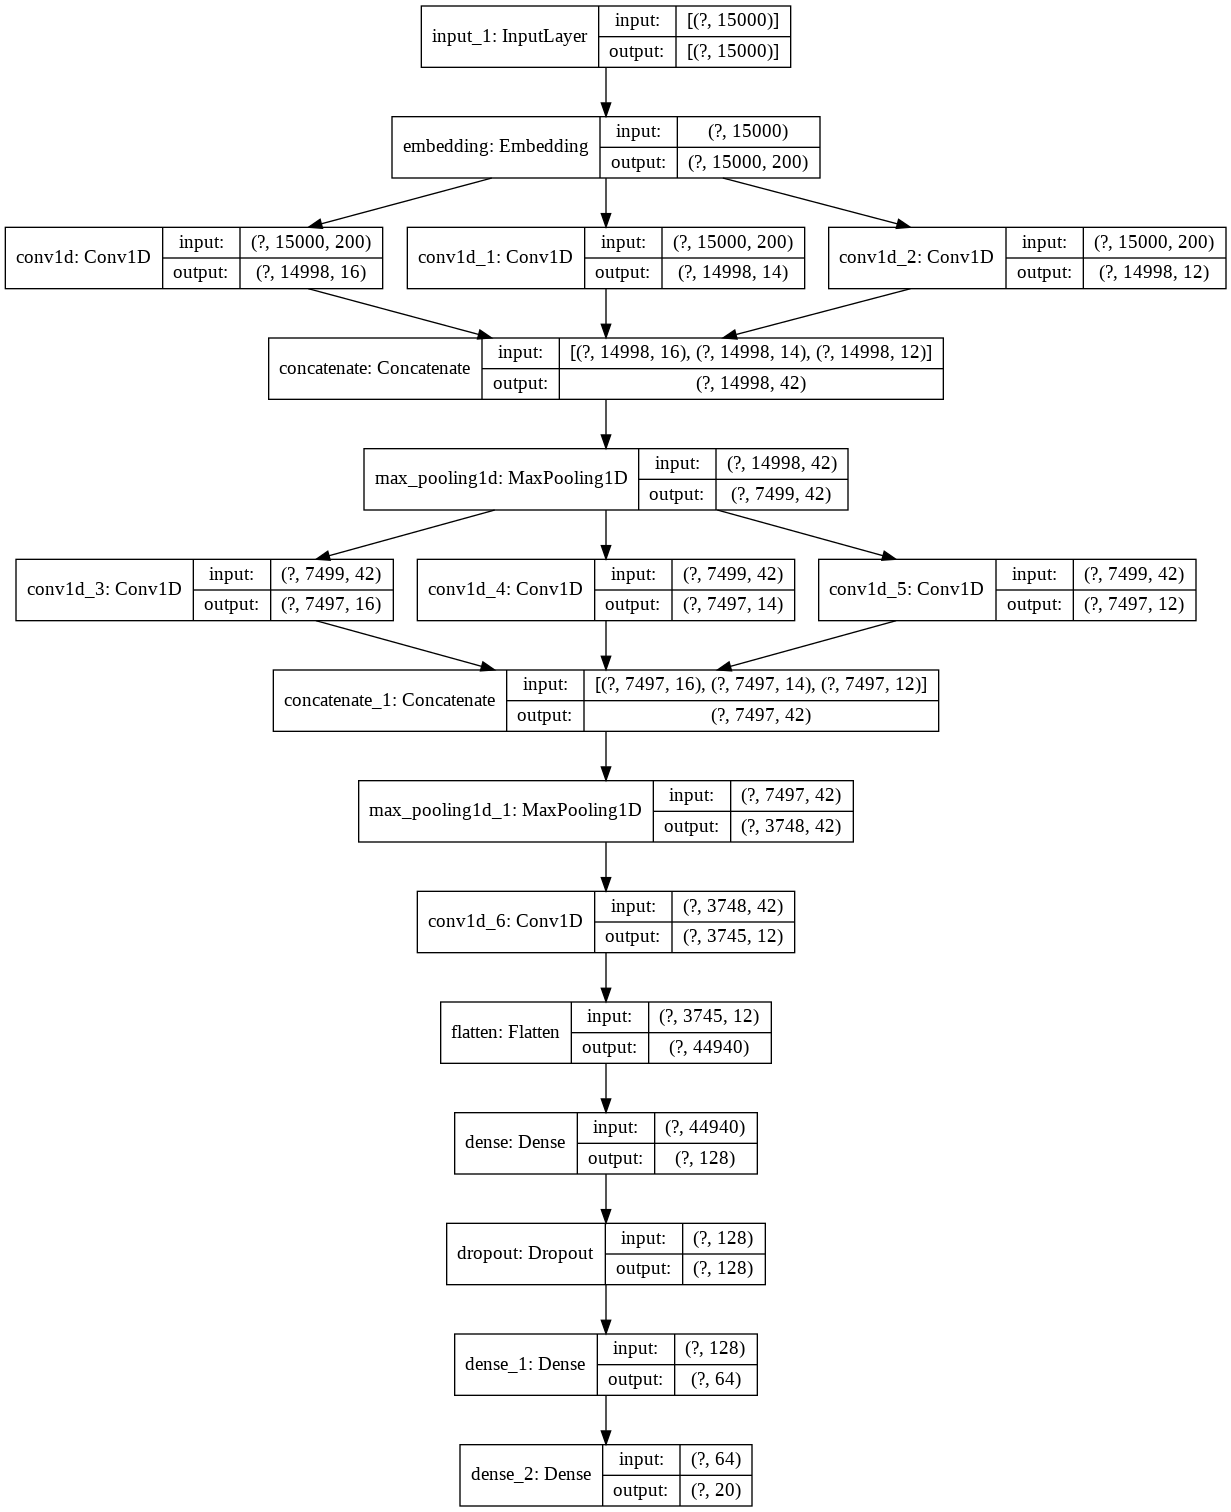

In [105]:
from tensorflow.keras.utils import plot_model
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [106]:
model1.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [107]:
tf.keras.backend.clear_session() 

In [ ]:
model1.fit(x_train_padded,one_hot_y_train,epochs=10,batch_size=40,validation_data=(x_test_padded,one_hot_y_test),callbacks=[val_acc_callback,metrics12,best_model_weight,tensorboard_callback])

Epoch 1/10
  1/177 [..............................] - ETA: 0s - loss: 3.0266 - accuracy: 0.0500WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
177/177 [==============================] - 207s 1s/step - loss: 2.6403 - accuracy: 0.1293 - val_loss: 2.0721 - val_accuracy: 0.2526
Epoch 2/10
177/177 [==============================] - 204s 1s/step - loss: 2.0107 - accuracy: 0.2757 - val_loss: 1.6750 - val_accuracy: 0.4041
Epoch 3/10
177/177 [==============================] - 203s 1s/step - loss: 1.5980 - accuracy: 0.4256 - val_loss: 1.4075 - val_accuracy: 0.5222
Epoch 4/10
177/177 [==============================] - 204s 1s/step - loss: 1.2914 - accuracy: 0.5345 - val_loss: 1.1931 - val_accuracy: 0.5912
Epoch 5/10
177/177 [==============================] - 204s 1s/step

#  Model-2 : Using 1D convolutions with character embedding

#callback for f1 score for model2

In [80]:
#from callback assignment
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
class f1_and_auc_score_model2(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        ## on begin of training, we are creating a instance varible called metrics11
        ## it is a dict with keys [loss, acc, val_loss, val_acc]
        self.metrics11={'f1_score': []}
        
    def on_epoch_end(self, epoch, logs={}): 
        y_pred_final=[]   
        y_predict_proba=self.model.predict(x_test_char_padded)  #it predicts probability
        for i in y_predict_proba:
            y_pred_final.append(np.argmax(i)) #whichever is maximum value thats index is class

        #for j in range(len(y_test1)):
        #    if y_predict_proba[j] <= 0.5:
        #       y_pred_final.append(0)
        #   else:
        #       y_pred_final.append(1)

        self.metrics11["f1_score"].append(f1_score(y_test,y_pred_final,average='micro'))
        #self.metrics11["auc_values"].append( roc_auc_score(y_test1,y_predict_proba))

        print("f1 score is ",self.metrics11["f1_score"][epoch])


In [81]:
metrics123=f1_and_auc_score_model2()

# stops epochs when vall accuracy reaches more than 10%

In [82]:
class myCallback_model2(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > 0.70):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(0.10*100))   
            self.model.stop_training = True

In [83]:
val_acc_callback_model2=myCallback_model2()

#tensorboard callback

In [ ]:
import os
logdir2= os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback2= tf.keras.callbacks.TensorBoard(logdir2, histogram_freq=1,write_graph=True,write_grads=True)

In [ ]:
logdir12

#modelcheckpoint callback

In [ ]:
filepath2="/content/best_model_L2h5"

In [ ]:
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
best_model_weight2=tf.keras.callbacks.ModelCheckpoint(filepath2, monitor='val_accuracy', verbose=0, save_best_only=True,save_weights_only=True, mode='auto', save_freq='epoch')

#Tokenization

In [84]:
t=Tokenizer(num_words=None,char_level=True,filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n') #removed underscore(_) from filters because we want it as charcter
t.fit_on_texts(x_train_data1)

In [85]:
char_index=t.word_index
len(char_index)

38

In [87]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train_char_sequence=t.texts_to_sequences(x_train_data1)
x_train_char_padded=pad_sequences(x_train_char_sequence,maxlen=40000,padding='post')

In [88]:
x_train_char_padded.shape

(14121, 40000)

In [89]:
x_test_char_sequence=t.texts_to_sequences(x_test_data1)
x_test_char_padded=pad_sequences(x_test_char_sequence,maxlen=40000,padding='post')

In [90]:
x_test_char_padded.shape

(4707, 40000)

#character level glove embeddings

In [91]:
embeddings_index1 = dict()

In [92]:
import numpy as np
f = open("/content/glove.840B.300d-char.txt") # for every word we will 300 d (features)
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index1[word] = coefs
f.close()
print('Loaded %s charcter vectors.' % len(embeddings_index1))

Loaded 94 charcter vectors.


In [93]:
vocab_size1=len(t.word_index)+1
vocab_size1

39

In [94]:
embedding_matrix1 = np.zeros((vocab_size1,300))

In [95]:
for char, i in t.word_index.items():
	embedding_vector = embeddings_index1.get(char)
	if embedding_vector is not None:
		embedding_matrix1[i] = embedding_vector

In [96]:
embedding_matrix1.shape

(39, 300)

In [99]:
#embedding_layer23=Embedding(vocab_size1,300,weights=[embedding_matrix1], input_length=20000, trainable=False)
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten,Conv1D,MaxPool1D,concatenate,Embedding
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,Input
from tensorflow.keras.models import Model

In [100]:
def model2():

    embedding_layer23=Embedding(vocab_size1,300,weights=[embedding_matrix1], input_length=40000, trainable=False)

    input_layer11=Input(shape=(40000,), dtype='int32')

    embedded_sequences=embedding_layer23(input_layer11)

    layer11=Conv1D(filters=32,kernel_size=3,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l2=0.01))(embedded_sequences)

    layer12=Conv1D(filters=16,kernel_size=5,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l2=0.01))(layer11)

    layer13=MaxPool1D(pool_size=2)(layer12)
    
    layer14=Conv1D(filters=16,kernel_size=3,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l2=0.01))(layer13)

    layer15=Conv1D(filters=16,kernel_size=5,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l2=0.01))(layer14)

    layer16=MaxPool1D(pool_size=2)(layer15)

    layer17=Flatten()(layer16)

    layer18=Dropout(0.5)(layer17)

    layer19=Dense(128,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=28),kernel_regularizer=tf.keras.regularizers.l2(l2=0.01))(layer18)

    output_layer1=Dense(20,activation="softmax",kernel_initializer=tf.keras.initializers.glorot_normal(seed=3))(layer19)

    model2=Model(input_layer11,output_layer1,name="model_2")

    return model2


In [101]:
model2=model2()

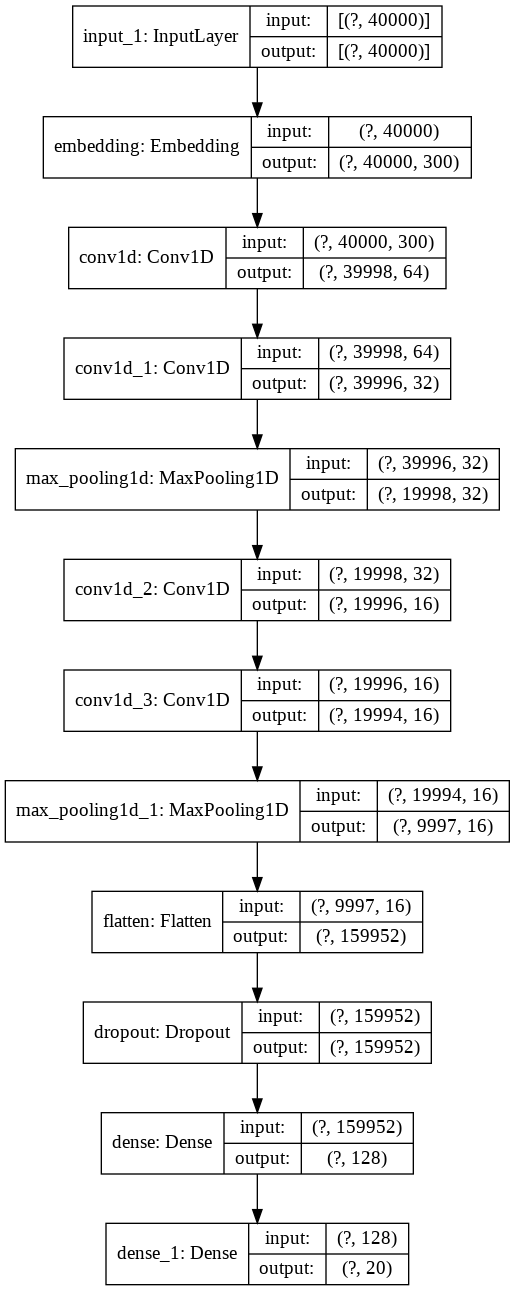

In [102]:
from tensorflow.keras.utils import plot_model
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [103]:
tf.keras.backend.clear_session() 

In [104]:
model2.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [105]:
model2.fit(x_train_char_padded,one_hot_y_train,epochs=5,batch_size=40,validation_data=(x_test_char_padded,one_hot_y_test),callbacks=[val_acc_callback_model2,metrics123,best_model_weight2,tensorboard_callback2])

Epoch 1/5
  1/354 [..............................] - ETA: 0s - loss: 7.4131 - accuracy: 0.0250WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
354/354 [==============================] - 301s 849ms/step - loss: 3.3080 - accuracy: 0.0718 - val_loss: 3.0063 - val_accuracy: 0.0835
Epoch 2/5
354/354 [==============================] - 304s 859ms/step - loss: 2.9893 - accuracy: 0.0819 - val_loss: 2.9752 - val_accuracy: 0.0839
Epoch 3/5
354/354 [==============================] - 305s 861ms/step - loss: 2.9762 - accuracy: 0.0859 - val_loss: 2.9586 - val_accuracy: 0.0869
Epoch 4/5
354/354 [==============================] - 304s 859ms/step - loss: 2.9653 - accuracy: 0.0821 - val_loss: 2.9539 - val_accuracy: 0.0854
Epoch 5/5
354/354 [==============================] - 304s 